# DNN(Deep Neural Network)
## 신경망 구성요소
### Train(학습) 프로세스
![image](https://tensorflowkorea.files.wordpress.com/2018/12/093.jpg)

### 학습 단계 및 역할
1. 모델: 추론
    - batch size 단위로 추론한다
2. 손실함수(Loss Function): 모델이 추론한 것과 정답간의 Loss(손실-오차)의 평균을 구한다
3. 옵티마이저(Optimizer): 손실함수가 구한 Loss를 기반으로 모델의 파라미터들(weight)을 업데이트한다
- **층(Layer)**: 모델이 추론하기 위한 각 단계를 정의
- **손실함수(loss function)**: 모델의 예측결과와 Ground Truth(실제 정답)사이의 차이를 계산
- **optimizer**: 파라미터(가중치)를 업데이트하여 모델의 성능을 최적화

## 유닛/노드/뉴런(Unit, Node, Neuron)
- 입력 Feature들을 입력받아 처리 후 출력하는 데이터 처리 모듈
    - Input -> Output
- 입력 값에 Weight(가중치)를 곱하고 bias(편향)을 더한 결과를 Activation함수에 넣어 최종 결과를 출력하는 계산을 처리
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*MXBl6qooI20S3rJIkyZxVA.png)
    - **Input vector(입력값)**: $\large\mathbb x=(x_1, x_2, x_3)^T$
    - **Weights(가중치)**: $\large\mathbb w = (w_1, w_2, w_3)^T$
    - **Bias(편향)**: $\large b \in \mathbb R$
    - **Activation function(활성함수)**: $\large\sigma(\cdot)$
        - 선형결합한 결과를 비선형화 시키는 목적
        - 다양한 비선형 함수들을 사용한다.
        
$\LARGE z=w_1 x_1 + w_2 x_2 + w_3 x_3 + b \Leftrightarrow z = \mathbb w^T \mathbb x + b$
$\LARGE a=\sigma( z)$

## 레이터/층(Layer)
- 네트워크 모델의 각 처리단계를 정의한 것
    - 실제 처리를 담당하는 Unit들을 모아놓은 구조

- **Input Layer(입력층)**
    - 입력값들을 받아 Hidden Layer에 전달하는 노드들로 구성된 Layer
    - 입력 데이터의 shape을 설정하는 역할을 한다

- **Output Layer(출력층)**
    - 모델의 최종 예측결과를 출력하는 노드들로 구성된 Layer

- **Hidden Layer(은닉층)**
    - Input Layer와 Output Layer사이에 존재하는 Layer

- 대부분 Layer들은 학습을 통해 최적화할 Parameter를 가짐
    - Dropout, Pooling Layer와 같이 Parameter가 없는 Layer도 있다

- Layer들의 연결한 것을 **<font size=5>Network</font>** 라고 한다
    - 딥러닝은 Layer들을 깊게 쌓은 것을 말한다(여러 Layer들을 연결한 것)

- 목적, 구현 방식에 다라 다양한 종류의 Layer들이 있다
    - **Fully Connected Layer(Dense layer)**
        - 추론 단계에서 주로 사용
    - **Convolution Layer**
        - 이미지 Feature extraction으로 주로 사용
    - **Recurrent Layer**
        - Sequential(순차)데이터의 Feature extraction으로 주로 사용
    - **Embedding Layer**
        - Text 데이터의 Feature extraction으로 주로 사용
        
- **API** 
    - https://keras.io/api/layers/
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers

## 모델(Network)
- Layer를 연결한 것이 Deep Learning 모델이다
- 이전 레이어의 출력을 input으로 받아 처리 후 output으로 출력하는 레이어들을 연결한다
- 적절한 network 구조(architecture)를 찾는 것은 공학적이기 보다는 경험적(Art)접근이 필요하다
![image](https://velog.velcdn.com/images/ppippi/post/8dd46d62-f23e-46e1-b6e7-4396095cb1c4/image.png)
- **API**
    - https://keras.io/api/models/
    - https://www.tensorflow.org/api_docs/python/tf/keras/models

## 활성 함수(Activation Function)
- 각 유닛이 입력과 Weight간에 가중합을 구한 뒤 출력결과를 만들기 위해 거치는 함수
- 같은 층(layer)의 모든 유닛들은 같은 활성 함수를 가진다
- **출력 레이어**의 경우 출력하려는 문제에 맞춰 활성함수를 결정한다.
- **은닉층(Hidden Layer)** 의 경우 비선형성을 주어 각 Layer가 처리하는 일을 분리하는 것을 목적으로 한다
    - 비선형함수를 사용하지지 않으면 Layer들을 여러개 추가하는 의미가 없어진다
    - **ReLU** 함수를 주로 사용한다

## 주요 활성함수(Activation Function)
- ### Sigmoid(logistic function)
    ![image](https://velog.velcdn.com/images/minjung00/post/9a2c5992-8f8c-40dc-92ef-327b9d985ee4/image.png)

    - $$\large \sigma(z) = \frac 1 {1+e^{-z}}$$
    - 출력값의 범위
        - $0<sigmoid(z)<1$
    - 한계
        - 초기 딥러닝의 hidden layer(은닉층)의 activation function(활성함수)로 많이 사용 되었다.
        - 층을 깊게 쌓을 경우 **기울기 소실(Gradient Vanishing)** 문제를 발생시켜 학습이 안되는 문제가 있다.
    - **Binary classification(이진 분류)를 위한 네트워크의 Output layer(출력층)의 활성함수로 사용된다.**
        - 모델이 positive(1)의 확률을 출력결과로 추론하도록 할 경우 사용. (unit개수 1, activation함수 sigmoid)
        - 위와 같은 한계때문에 hidden layer(은닉층)의 activation function(활성함수)로는 잘 사용되지 않는다.


> ### **기울기 소실(Gradient Vanishing)** 문제란?
> - 최적화 과정에서 gradient가 0이 되어 Bottom Layer의 가중치들이 학습이 안되는 현상
>   - Bottom Layer: Input Layer(입력층)에 가까이 있는 Layer들
>   - Top Layer: Output Layer(출력층)에 가까이 있는 Layer들

- ### Hyperbolic tangent
    ![image](https://velog.velcdn.com/images/minjung00/post/eb93b227-a022-4489-9f1c-9693b2137a3f/image.png)
    - $$\large  tanh(z) = \cfrac{e^{z} - e^{-z}}{{e^{z} + e^{-z}}}$$
    - 출력값의 범위
        - $-1<tanh(z)<1$
    - Output이 0을 중심으로 분포하므로 sigmoid보다 학습에 효율 적이다.
    - 기울기 소실(Gradient Vanishing) 문제를 발생시킨다.

- ### ReLU(Rectified Linear Unit)
    ![image](https://velog.velcdn.com/images/minjung00/post/2df77932-f75b-4087-b83d-1a9d11a82e9c/image.png)
    $$\large  ReLU(z)=max(0,z)$$
    - 기울기 소실(Gradient Vanishing) 문제를 어느정도 해결
    - 0이하의 값(z <= 0)들에 대해 뉴런이 죽는 단점이 있다. (Dying ReLU)

- ### Leaky ReLU
    ![image](https://velog.velcdn.com/images/minjung00/post/f8ff3726-79dc-4c9e-9a00-99e65caa7eec/image.png)
    <br><br>
     $$\large  LeakyReLU(z)=max(\alpha z,z)\\
     0< \alpha <1$$
    - ReLU의 Dying ReLU 현상을 해결하기 위해 나온 함수
    - 음수 z를 0으로 반환하지 않고 alpah (0 ~ 1 사이 실수)를 곱해 반환한다. 


- ### Softmax
    $$\large  Softmax(z_j) = \frac{exp(z_j)}{\sum_{k=1}^K exp(z_k)}\\ \:j=1,2, \ldots, K$$
    - **Multi-class classification(다중 분류)를 위한 네트워크의 Output layer(출력층)의 활성함수로 주로 사용된다.** 
        - 은닉층의 활성함수로 사용하지 않는다.
    - Layer의 unit들의 출력 값들을 정규화 하여 각 class에 대한 확률값으로 변환한다.
        - 출력노드들의 값은 0 ~ 1사이의 실수로 변환되고 그 값들의 총합은 1이 된다.
- **API**
    - https://keras.io/api/layers/activations/
    - https://www.tensorflow.org/api_docs/python/tf/keras/activations

## 손실함수(Loss function, 비용함수)
- Model이 출력한 예측값(prediction) $\hat y^{(i)}$와 실제 데이터(output) $y^{(i)}$의 차이를 계산하는 함수
- 네트워크 모델을 훈련하는 동안 Loss 함수가 계산한 Loss값(손실)이 최소화 되도록 파라미터(가중치와 편향)을 업데이트한다.
    - 즉 Loss함수는 최적화 시작이 되는 값이다.
- 네트워크 모델이 해결하려는 문제의 종류에 따라 다른 Loss함수를 사용한다.
- <font size="5" color="red">해결하려는 문제의 종류에 따라 표준적인 Loss function이 있다.</font>

- ### Classification(분류)
    - cross entropy(log loss) 사용
$$
\large log(모델이\,출력한\,정답에\,대한\,확률)
$$


- ### Binary classification(이진 분류)
    - 두 개의 클래스를 분류
        - 모델이 양성(1)의 확률을 출력하여 Threshold보다 작으면 0, 크면 1로 label을 예측
    - 예) 문장을 입력하여 긍정/부정 구분
    - Output Layer의 unit 개수를 1로 하고 activation 함수로 sigmoid를 사용하여 positive(1)의 확률로 예측 결과를 출력하도록 모델을 정의 한 경우 **binary_crossentropy**를 loss function으로 사용
    - $$\large Loss(\hat y^{(i)} ,y^{(i)}) = - y^{(i)} log(\hat y^{(i)} ) - (1- y^{(i)}) log (1-\hat y^{(i)} )$$
    
        - $y^{(i)}$: 실제 값(Ground Truth), $\hat y^{(i)}$: 예측확률

- ### Multi-class classification(다중 클래스 분류)
    - 두 개 이상의 클래스를 분류
        - 여러 개 중 하나
    - 예) 이미지를 0, 1, 2, ..., 9 구분
    - **categorical_crossentropy**를 loss function으로 사용
    - $$\large Loss(\hat y_c^{(i)} ,y^{(i)}) = - \sum_{c=1}^C y_c^{(i)} log(\hat y_c^{(i)})$$
        - $y^{(i)}$: 실제 값(Ground Truth), $\hat y_c^{(i)}$: class별 예측확률

- ### Regression(회귀)
    - 연속형 값을 예측
        - 예) 주가 예측
    - **Mean squared error**를 loss function으로 사용
        - "MSE"로 지정
    - $$\large Loss(\hat y^{(i)} ,y^{(i)}) = \frac  1 2 (\hat y^{(i)} - y^{(i)})^2$$
        - $y^{(i)}$: 실제 값(Ground Truth), $\hat y^{(i)}$: 예측 값

- **API**
    - https://keras.io/api/losses/
    - https://www.tensorflow.org/api_docs/python/tf/keras/losses

## 평가지표(Metrics)
- 모델의 성능을 평가하는 지표
- 손실함수(Loss Function)와 차이
    - 손실함수는 모델을 학습할 때 가중치 업데이트를 위한 오차를 구할 때 사용
    - 평가지표 함수는 모델의 성능이 확인하는데 사용
- **API**
    - https://keras.io/api/metrics/
    - https://www.tensorflow.org/api_docs/python/tf/keras/metrics


## 문제별 출력 레이어 Activation 함수, Loss 함수
문제형태|Activation 함수|Loss 함수
 :- | :- | :-
이진분류(Binary Classification)|sigmoid| binary_crossentropy
다중분류(Multi-class Classification)|softmax| categorical_crossentropy<br>sparse_categorical_crossentropy
회귀(Regression)|None|MSE

## Optimizer(최적화 방법)
- Training시 모델 네트워크의 parameter를 데이터에 맞춰 최적화 하는 알고리즘
    - Deep Learning은 경사하강법(Gradient Descent)와 오차 역전파(back propagation) 알고리즘을 기반으로 파라미터들을 최적화

### Gradient Descent(경사하강법)
- #### 최적화
    - 모델 네트워크가 출력한 결과와 실제값(Ground Truth)의 차이를 정의하는 함수를 **Loss function(손실함수, 비용함수)** 라고 한다
    - Training시 Loss function이 출력하는 값을 줄이기 위해 파라미터(weight, bias)를 update 과정을 **최적화(Optimization)** 이라고 한다
    
- #### Gradient Descent(경사하강법)
    - 최적화를 위해 파라미터들에 대한 Loss function의 Gradient값을 구해 Gradient의 반대 방향으로 일정 크기 만큼 파라미터들을 업데이트하는 것을 경사하강법 이라고 한다
$$\large W_{new} = W-\alpha\frac{\partial}{\partial {W}}Loss(W)\\W: 파라미터\: \alpha:학습률$$

### 오차 역전파(Back Propagation)
- 딥러닝 학습 시 파라미터를 최적화 할 때 추론한 역방향으로 loss를 전달하여 단계적으로 파라미터들을 업데이트
    - Loss에서부터(뒤에서 부터) 한 단계씩 미분해 gradient 값을 구하고 이를 **Chain rule(연쇄법칙)**에 의해 곱해가면서 파라미터를 최적화
    - 출력에서 입력 방향으로 계산하여 **역전파(Back propagation)**라고 함
        - 추론의 경우 입력에서 출력 방향으로 계산하며 이것은 **순전파(Forward propagation)** 이라고 함

#### 계산 그래프 (Computational Graph)
- 복잡한 계산 과정을 자료구조의 하나인 그래프로 표현한 것
    - 딥러닝 모델이 구현된 방식
- 그래프는 노드(Node)와 엣지(Edge)로 구성
    - 노드: 연산을 정의
    - 엣지: 데이터가 흘러가는 방향

#### 계산 그래프 절차 및 특징/장점
- 계산 그래프를 사용한 문제 풀이 절차
    - 계산 그래프를 구성
    - 계산 방향을 결정
        - 계산 시작에서 계산 결과 방향으로 순서대로 계산: **순전파(Forward propagation)**
        - 계산 결과에서 계산 시작 역방향으로 계산: **역전파(Back propagation)**
- 특징/장점
    - **국소적 계산**을 통해 결과를 얻는다
        - 각 노드의 계산은 자신과 관계된 정보(입력 값들)만 가지고 계산한 뒤 그 결과를 다음으로 출력
    - 복잡한 계산을 단계적으로 나눠 처리해 문제를 단순하게 만들어 계산
        - **딥러닝에서 역전파를 이용해 각 가중치 업데이트를 위한 미분(기울기) 계산을 효율적으로 할 수 있게 된다**
    - 중간 계산 결과를 보관 가능

## 합성함수의 미분
- ### **합성함수: 여러 함수로 구성된 함수**
$$
\large z = (x+y)^2\\
\large z = t^2\\
\large t=x+y
$$

- ### **연쇄 법칙(Chain Rule)**
    - 합성함수의 미분은 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
$$
\large\cfrac{\partial z}{\partial x} = \cfrac{\partial z}{\partial t} \cfrac{\partial t}{\partial x} \\
\cfrac{\partial z}{\partial t} = 2t,\;\cfrac{\partial t}{\partial x} = 1 \\
\large\cfrac{\partial z}{\partial x}=2t \times 1 = 2(x+y)
$$

### 연쇄 법칙과 계산 그래프
![image](https://blog.kakaocdn.net/dn/8GfuX/btq52A4pgZv/KPKZ2ZK1Hm81tNn2DoP4F1/img.png)
![image](https://blog.kakaocdn.net/dn/bHGclD/btq64TBHoF9/5UPrfCQP1PUPKtij1iwgo0/img.png)

- **순전파(forward propagation): 추론**
- **역전파(back propagation): 학습시 파라미터(weight) 업데이트**

## 파라미터 업데이트 단위

- ### **Batch Gradient Descent(배치 경사하강법)**
    - Loss를 계산할 때 전체 학습데이터를 사용해 그 평균값을 기반으로 파라미터를 최적화
    - 많은 계산량이 필요해 속도가 느리나 학습 데이터가 클 경우 메모리가 부족할 수 있다
    - 1 step에 모든 데이터를 사용
    - 학습이 안정적

- ### **Mini Batch Stochastic Gradient Descent(미니배치 확률적 경사하강법)**
    - Loss를 계산할 때 전체 데이터를 다 사용하지 않고 지정한 데이터 양(batch size) 만큼 마다 계산해 파라미터를 업데이트
    - 계산은 빠른 장점이 있지만 최적값을 찾아가는 방향이 불안정하여 부정확하다. 그러나 반복 횟수를 늘리면 Batch 방식과 유사한 결과로 수렴
    - 전체 데이터중 일부 데이터만 사용
    - batch 사이즈는 가능하면 크게 하는게 좋다

- ### **Stochastic Gradient Descent(확률적 경사하강법)**
    - 1 step의 데이터는 1개, 총 step수 만큼의 데이터를 사용
    - 이상치에 취약, 학습이 불안정
    - 계산량이 적고 메모리가 부족하지 않다

> **스텝(Step)**: 한번 파라미터를 업데이트하는 단위

![image](https://velog.velcdn.com/images/bleu/post/ea5c5a67-75c2-4de7-b653-9040c4863c16/image.png)

### SGD를 기반으로 한 주요 옵티마이저
- 경사하강법 알고리즘을 바탕으로 개선
    - 방향성을 개선한 최적화 방법
        - Momentum
        - NAG(Nesterov Accelerated Gradient)
    - 학습률을 개선한 최적화 방법
        - Adagrad
        - RMSProp
    - 방향성 + 학습률 개선 최적화 방법
        - Adam
        
![image](https://velog.velcdn.com/images/minjung00/post/0b19c3a4-95bb-45ac-a1cd-c1aff4b57393/image.png)

- **API**
    - https://keras.io/api/optimizers/
    - https://www.tensorflow.org/api_docs/python/tf/keras/activations

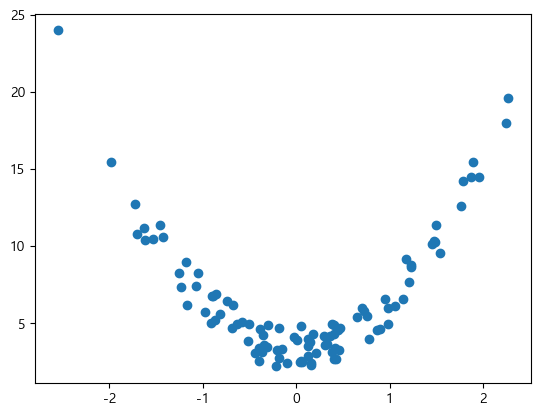

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def func(x):
    return 3*x**2 + 2 + np.random.rand(*x.shape)*3

X = np.random.randn(100, 1)
y = func(X)

plt.scatter(X, y)
plt.show()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential()
model1.add(layers.InputLayer(input_shape=(1, )))
model1.add(layers.Dense(10))
model1.add(layers.Dense(1))
model1.compile(optimizer = 'adam', loss = 'mse')
model1.fit(X, y, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 59.1832
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 58.9680
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 58.7569
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 58.5458
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 58.3271
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 58.1112
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 57.9022
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 57.6640
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 57.4344
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 57.2141
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 56.9892
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 56.7553
Epoch 13/200
4/4 [==============================]

32/32 [==============================] - 0s 1ms/step


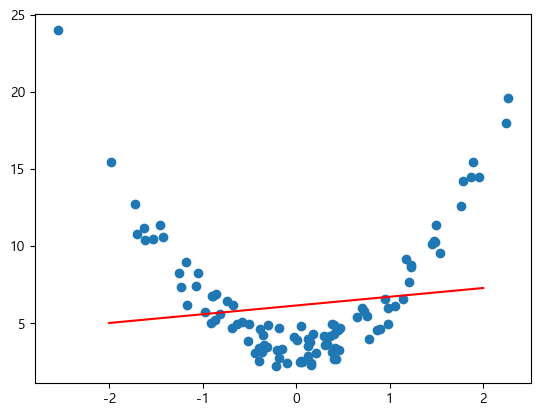

In [4]:
X_new = np.linspace(-2, 2, 1000).reshape(1000, 1)
pred_y = model1.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, pred_y, color = 'r')
plt.show()

In [5]:
model2 = keras.Sequential([
    layers.Dense(10, input_shape=(1, )),
    layers.ReLU(),
    layers.Dense(1)
])

model2.compile(optimizer = 'adam', loss = 'mse')
model2.fit(X, y, epochs = 600)

Epoch 1/600
4/4 [==============================] - 1s 3ms/step - loss: 53.0385
Epoch 2/600
4/4 [==============================] - 0s 3ms/step - loss: 52.6838
Epoch 3/600
4/4 [==============================] - 0s 3ms/step - loss: 52.3021
Epoch 4/600
4/4 [==============================] - 0s 3ms/step - loss: 51.9643
Epoch 5/600
4/4 [==============================] - 0s 3ms/step - loss: 51.5902
Epoch 6/600
4/4 [==============================] - 0s 3ms/step - loss: 51.2140
Epoch 7/600
4/4 [==============================] - 0s 2ms/step - loss: 50.8300
Epoch 8/600
4/4 [==============================] - 0s 3ms/step - loss: 50.4359
Epoch 9/600
4/4 [==============================] - 0s 3ms/step - loss: 50.0636
Epoch 10/600
4/4 [==============================] - 0s 3ms/step - loss: 49.6850
Epoch 11/600
4/4 [==============================] - 0s 3ms/step - loss: 49.3086
Epoch 12/600
4/4 [==============================] - 0s 3ms/step - loss: 48.9153
Epoch 13/600
4/4 [==============================]

32/32 [==============================] - 0s 3ms/step


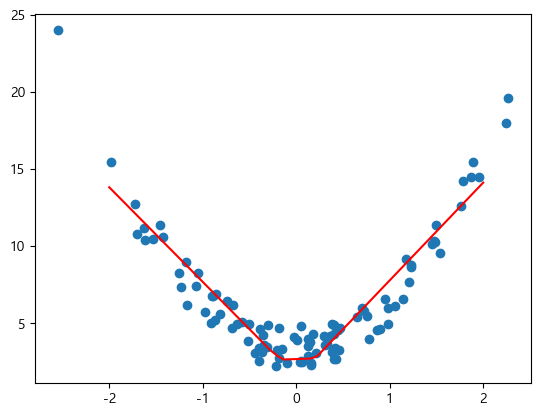

In [6]:
X_new = np.linspace(-2, 2, 1000).reshape(1000, 1)
pred_y = model2.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, pred_y, color = 'r')
plt.show()